<a href="https://colab.research.google.com/github/Jackyscy/cv/blob/main/Temperature_Spread_Regularizarion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("GT data for 3-hour intervel learning1.csv", parse_dates=["Date_Time"],
        index_col=["Date_Time"],)

data.head()

,Combust Monitor Actual Spread 1,Turb Exhaust T1,Turb Exhaust T2,Turb Exhaust T3,Turb Exhaust T4,Turb Exhaust T5,Turb Exhaust T6,Turb Exhaust T7,Turb Exhaust T8,Turb Exhaust T9,...,Combust Ref Temp,GT Compres Disch Press,GT Compres Discharge Temp,GT Compres Inlet Temp,GT Exhaust Gas Flow,GT Fuel Gas Mass Flow,GT IGV Position,GT Turbine Inlet Temp,GT Gross MW,GT Baseload Power Output Expected
Date_Time,,,,,,,,,,,,,,,,,,,,,
2021-09-05 13:50:00,31.056818,617.558472,630.641113,623.100586,624.433838,622.997681,629.324280,624.259338,613.819336,614.424744,...,1323.189209,1506.065918,409.284668,29.372759,617.549011,12.966751,87.996284,1246.550537,211.845764,229.368973
2021-09-05 16:50:00,29.123943,617.433899,627.732971,620.316772,625.417481,625.806457,631.588562,623.166626,613.281372,616.283813,...,1323.006714,1495.955322,410.848724,30.342381,616.006531,12.882809,87.994431,1247.431152,211.376907,228.132767
2021-09-05 19:50:00,29.981073,617.737305,626.815002,620.644348,626.150207,626.840393,632.476074,623.707764,613.928162,616.272095,...,1324.548096,1503.727417,410.733215,30.131554,619.785584,12.721853,87.991333,1247.777954,212.360016,228.515640
2021-09-06 10:50:00,29.942198,616.953918,624.698975,621.066834,625.358582,623.719666,631.418030,620.302856,611.742188,617.621704,...,1324.031982,1492.666870,412.803863,30.939713,611.674560,12.585037,88.001442,1248.785034,209.649109,227.099030
2021-09-06 13:50:00,27.763840,616.664490,623.856750,619.643860,624.923584,625.768555,631.285461,621.734375,612.153931,616.143250,...,1322.438599,1484.694092,412.501587,30.283035,618.603455,12.714616,88.000969,1246.161621,210.130875,227.029388


In [3]:
data.tail()

,Combust Monitor Actual Spread 1,Turb Exhaust T1,Turb Exhaust T2,Turb Exhaust T3,Turb Exhaust T4,Turb Exhaust T5,Turb Exhaust T6,Turb Exhaust T7,Turb Exhaust T8,Turb Exhaust T9,...,Combust Ref Temp,GT Compres Disch Press,GT Compres Discharge Temp,GT Compres Inlet Temp,GT Exhaust Gas Flow,GT Fuel Gas Mass Flow,GT IGV Position,GT Turbine Inlet Temp,GT Gross MW,GT Baseload Power Output Expected
Date_Time,,,,,,,,,,,,,,,,,,,,,
2023-09-04 13:50:00,28.114704,632.548584,638.530884,631.855469,633.613098,630.974243,642.091248,634.606018,620.106750,626.998962,...,1335.928345,1458.109741,412.556183,32.354118,596.771118,12.701917,88.007835,1258.171509,204.570252,222.550369
2023-09-04 16:50:00,27.892914,633.106567,637.187439,631.111633,633.411438,634.061890,644.028442,634.482605,619.937988,627.750977,...,1335.401123,1454.895142,411.719696,32.256824,595.678467,12.690415,87.997871,1257.593872,204.507431,222.480560
2023-09-04 19:50:00,27.304697,633.340698,636.345032,631.455933,636.031067,635.480286,643.962219,632.942932,619.241577,628.589172,...,1335.482300,1456.803223,411.852020,32.686016,599.527161,12.707642,87.990623,1255.408325,204.294098,222.184906
2023-09-05 10:50:00,32.104561,633.002991,637.250061,631.297852,632.999329,627.444763,640.027466,629.346619,608.981079,623.630615,...,1332.753174,1476.278320,410.778625,30.237215,606.179260,12.860698,87.973885,1257.222900,208.281952,227.718658
2023-09-05 13:50:00,29.274269,635.149780,642.015808,631.123230,631.984192,632.994080,642.784119,632.501770,616.314880,625.491943,...,1334.522461,1461.647827,413.377594,31.664816,599.825195,12.715439,87.992363,1259.505859,205.621628,224.121460


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3239 entries, 2021-09-05 13:50:00 to 2023-09-05 13:50:00
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Combust Monitor Actual Spread 1    3239 non-null   float64
 1   Turb Exhaust T1                    3239 non-null   float64
 2   Turb Exhaust T2                    3239 non-null   float64
 3   Turb Exhaust T3                    3239 non-null   float64
 4   Turb Exhaust T4                    3239 non-null   float64
 5   Turb Exhaust T5                    3239 non-null   float64
 6   Turb Exhaust T6                    3239 non-null   float64
 7   Turb Exhaust T7                    3239 non-null   float64
 8   Turb Exhaust T8                    3239 non-null   float64
 9   Turb Exhaust T9                    3239 non-null   float64
 10  Turb Exhaust T10                   3239 non-null   float64
 11  Turb Exhaust T11    

<Axes: >

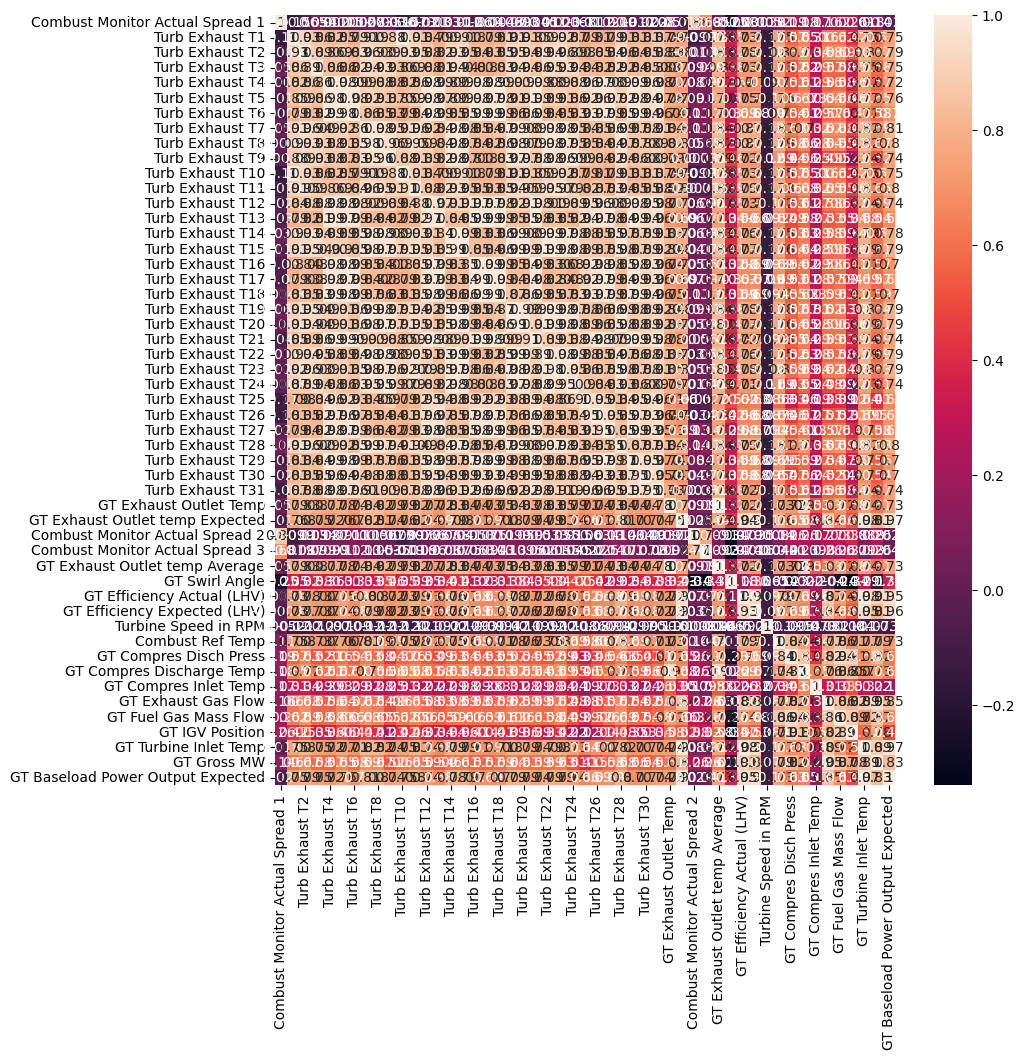

In [5]:
fig, ax = plt.subplots(figsize=(10,10))

corr = data.corr()
sns.heatmap(corr , annot = True , ax=ax)

Comment above: It is hard to see the number of correction for each features

In [6]:
#print("Slewness in Column: Combust Monitor Actual Spread 1", data["Combust Monitor Actual Spread 1"].skew)

#plt.hist(data["Combust Monitor Actual Spread 1"])
#plt.show()

Normal disctribustion can be used for the

In [7]:
#from scipy import stats

#col_cox , lam = stats.boxcox(data["Combust Monitor Actual Spread 1"])[0:2]
#print("Skewness in Column : Sqrt Combust Monitor Actual Spread 1s " ,pd.Series(col_cox).skew())

#plt.hist(col_cox)
#plt.show()

In [8]:
#data["Combust Monitor Actual Spread 1"] = col_cox

In [9]:
remaining_columns = list(data.columns)
remaining_columns.remove("Combust Monitor Actual Spread 1")

In [10]:
X = data[remaining_columns].values
Y = data['Combust Monitor Actual Spread 1'].values

In [11]:
from sklearn.model_selection import train_test_split

Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

In [12]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
Xtrain = Scaler.fit_transform(Xtrain)
Xtest = Scaler.transform(Xtest)

In [13]:
Xtrain.shape , Xtest.shape

((2591, 50), (648, 50))

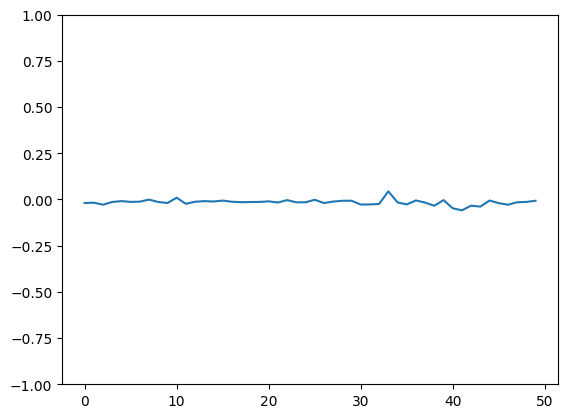

In [14]:
# check whether data is standardized or not
# mean should be 1

plt.ylim(-1,1)

means = []
for i in range(X.shape[1]):
    means.append(np.mean(Xtest[:,i]))
plt.plot(means , scaley=False)

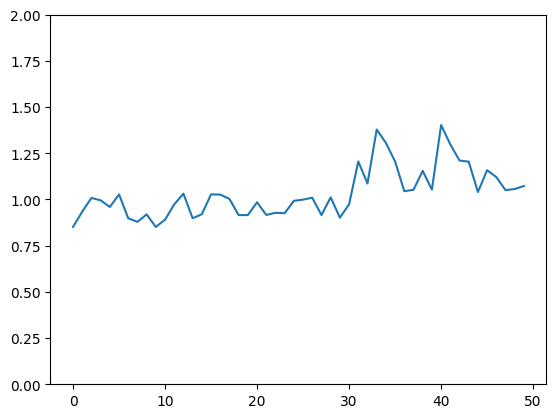

In [15]:
# Check variances

plt.ylim(0,2)

vars = []
for i in range(X.shape[1]):
    vars.append(np.var(Xtest[:,i]))
plt.plot(vars)

In [16]:
from sklearn.linear_model import Ridge , Lasso , ElasticNet , LinearRegression

In [29]:
model_linear = LinearRegression()
model_linear.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model_linear.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model_linear.score(Xtest , Ytest))

 Training Accuracy :  0.8796146341621303
 Testing Accuracy :  0.9120372424272715


Text(0, 0.5, 'Importance')

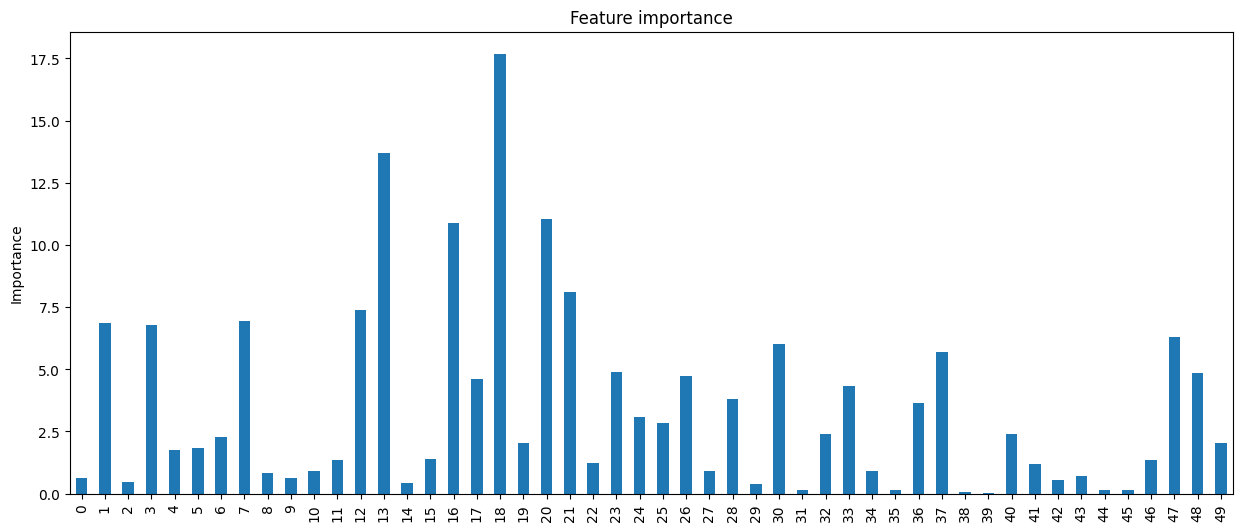

In [31]:
# Let's now plot the feature's importance
# according to the linear model.

# Create series with feature importance.
tmp = pd.Series(np.abs(model_linear.coef_))

# Let's add the variable names.
Xtrain = pd.DataFrame(Xtrain)
tmp.index = Xtrain.columns

# Let's make a bar plot.
tmp.plot.bar(figsize=(15, 6))
plt.title("Feature importance")
plt.ylabel("Importance")

In [35]:
# if the data set has less number of features and the features have less correlations among themselves
model_ridge = Ridge()
model_ridge.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model_ridge.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model_ridge.score(Xtest , Ytest))

 Training Accuracy :  0.8785247308469409
 Testing Accuracy :  0.9154872573126958


Text(0, 0.5, 'Importance')

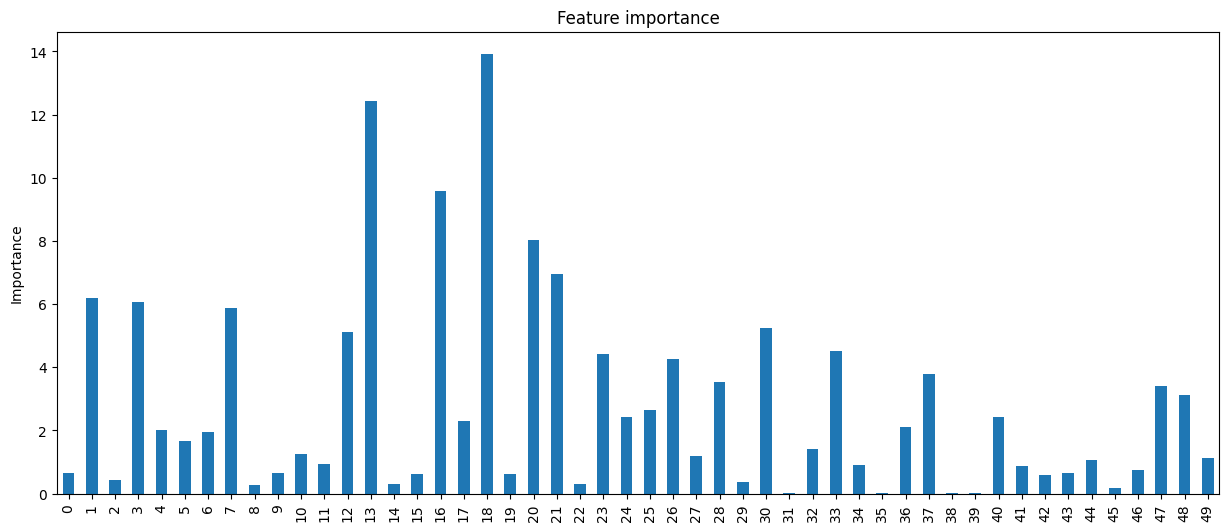

In [36]:
# Let's now plot the feature's importance
# according to the Ridge model.

# Create series with feature importance.
tmp = pd.Series(np.abs(model_ridge.coef_))

# Let's add the variable names.
Xtrain = pd.DataFrame(Xtrain)
tmp.index = Xtrain.columns

# Let's make a bar plot.
tmp.plot.bar(figsize=(15, 6))
plt.title("Feature importance")
plt.ylabel("Importance")

In [38]:
# Using Lasso the weight of few features will become zero. this will lead data loss
model_lasso = Lasso()
model_lasso.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model_lasso.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model_lasso.score(Xtest , Ytest))

 Training Accuracy :  0.7367310689531166
 Testing Accuracy :  0.8106818003317782


Text(0, 0.5, 'Importance')

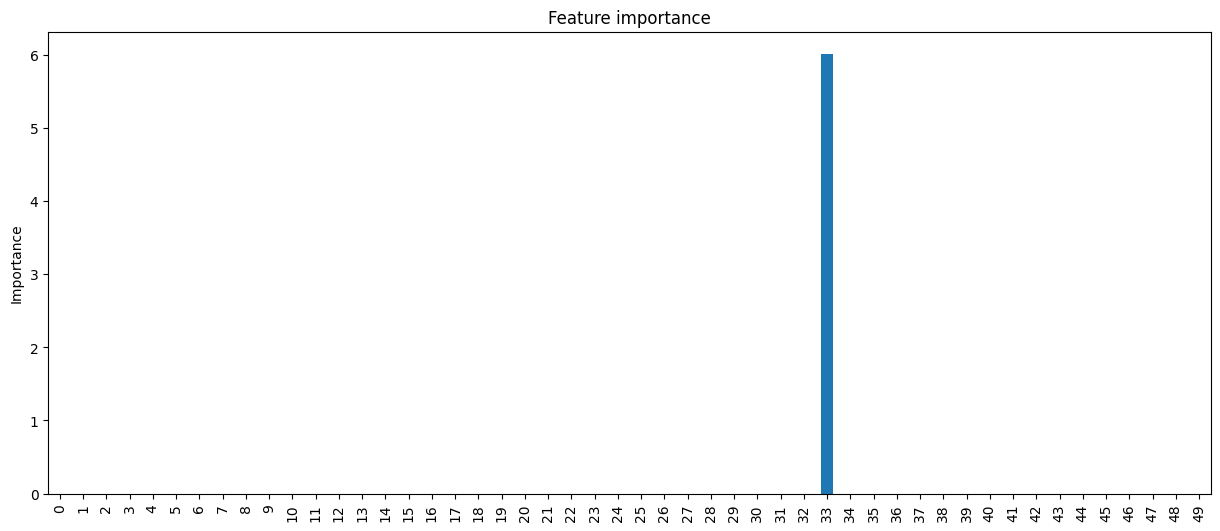

In [39]:
# Let's now plot the feature's importance
# according to the Lasso model.

# Create series with feature importance.
tmp = pd.Series(np.abs(model_lasso.coef_))

# Let's add the variable names.
Xtrain = pd.DataFrame(Xtrain)
tmp.index = Xtrain.columns

# Let's make a bar plot.
tmp.plot.bar(figsize=(15, 6))
plt.title("Feature importance")
plt.ylabel("Importance")

In [41]:
# Elastic

# lambda_1*L1 + lambda_2*L2
# alpha = lambda_1 + lambda_2 , l1_ratio = lambda_1/(lambda_1 + lambda_2)

model_elasticnet = ElasticNet()
model_elasticnet.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model_elasticnet.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model_elasticnet.score(Xtest , Ytest))

 Training Accuracy :  0.6758872043160553
 Testing Accuracy :  0.7239519428604408


Text(0, 0.5, 'Importance')

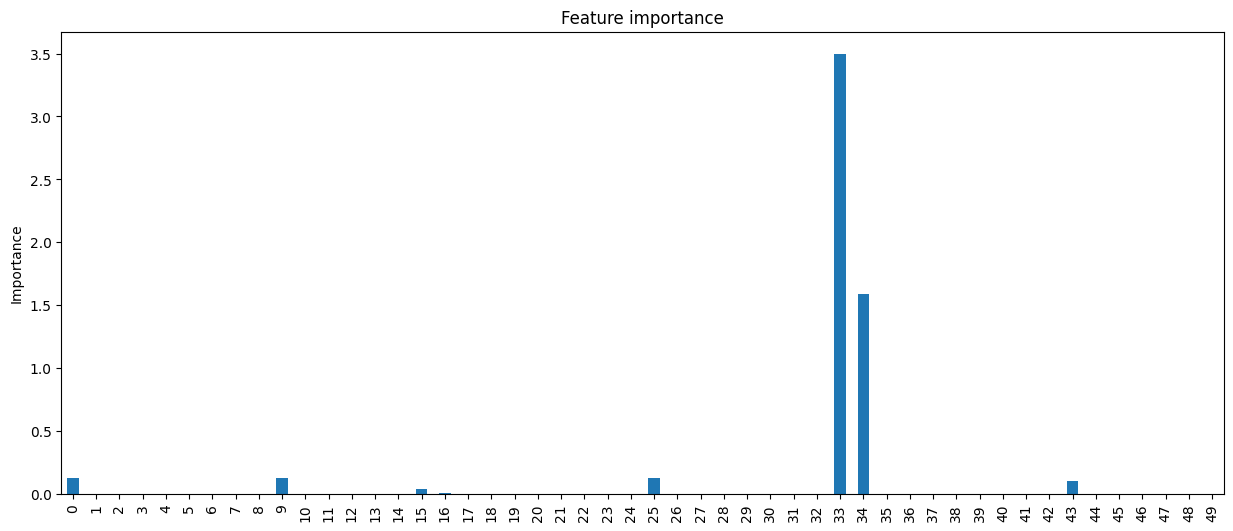

In [42]:
# Let's now plot the feature's importance
# according to the Elastic model.

# Create series with feature importance.
tmp = pd.Series(np.abs(model_elasticnet.coef_))

# Let's add the variable names.
Xtrain = pd.DataFrame(Xtrain)
tmp.index = Xtrain.columns

# Let's make a bar plot.
tmp.plot.bar(figsize=(15, 6))
plt.title("Feature importance")
plt.ylabel("Importance")

Changing Parameter for Lasso and ElasticNet

In [46]:
model_Lasso_alpha = Lasso(alpha = 0.01)
model_Lasso_alpha.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model_Lasso_alpha.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model_Lasso_alpha.score(Xtest , Ytest))

 Training Accuracy :  0.8699280032058452
 Testing Accuracy :  0.9178097186181754


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.372e+03, tolerance: 1.696e+01
  model = cd_fast.enet_coordinate_descent(


Text(0, 0.5, 'Importance')

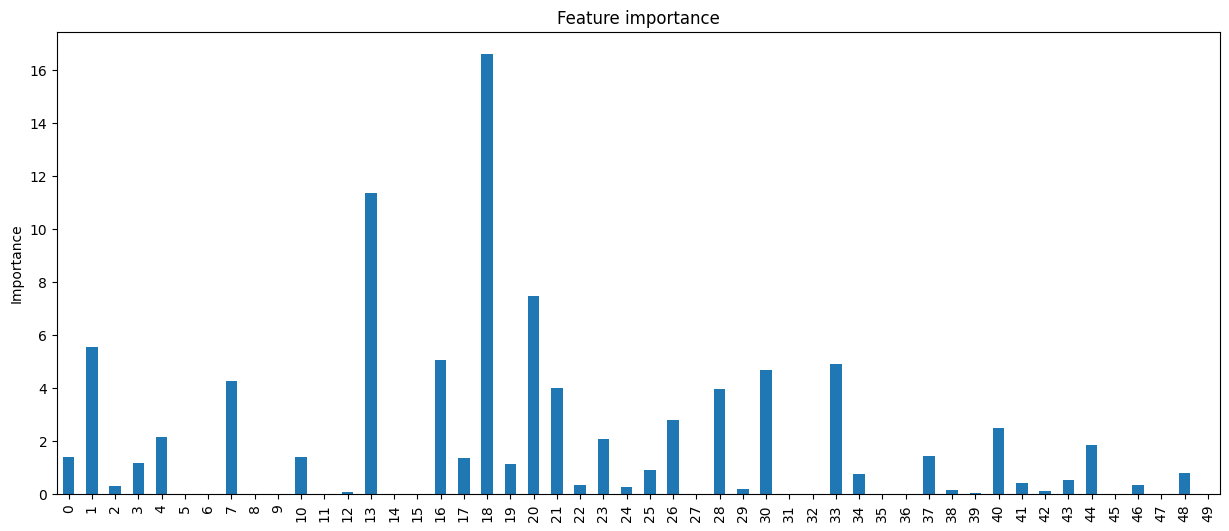

In [47]:
# Let's now plot the feature's importance
# according to the Lasso model.

# Create series with feature importance.
tmp = pd.Series(np.abs(model_Lasso_alpha.coef_))

# Let's add the variable names.
Xtrain = pd.DataFrame(Xtrain)
tmp.index = Xtrain.columns

# Let's make a bar plot.
tmp.plot.bar(figsize=(15, 6))
plt.title("Feature importance")
plt.ylabel("Importance")

In [52]:
# Elastic

# lambda_1*L1 + lambda_2*L2
# alpha = lambda_1 + lambda_2 , l1_ratio = lambda_1/(lambda_1 + lambda_2)

model_elasticnet_alpha = ElasticNet(alpha = 0.01 + 0.01 , l1_ratio = 0.01/(0.01 + 0.01))
model_elasticnet_alpha.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model_elasticnet_alpha.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model_elasticnet_alpha.score(Xtest , Ytest))

 Training Accuracy :  0.8445240282824562
 Testing Accuracy :  0.9093567947797626


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.913e+03, tolerance: 1.696e+01
  model = cd_fast.enet_coordinate_descent(


Text(0, 0.5, 'Importance')

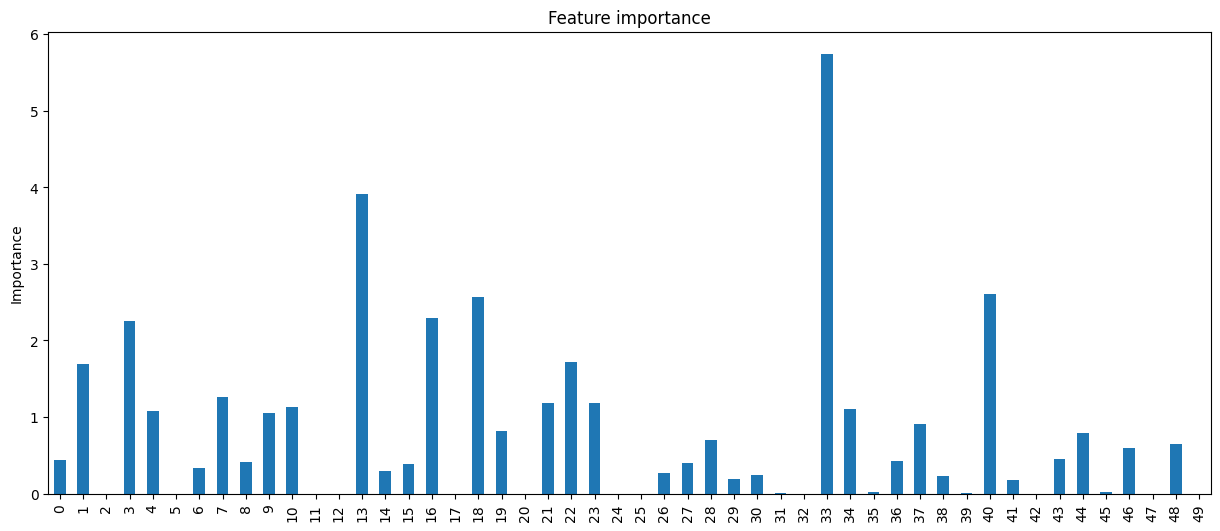

In [53]:
# Let's now plot the feature's importance
# according to the Elastic model.

# Create series with feature importance.
tmp = pd.Series(np.abs(model_elasticnet_alpha.coef_))

# Let's add the variable names.
Xtrain = pd.DataFrame(Xtrain)
tmp.index = Xtrain.columns

# Let's make a bar plot.
tmp.plot.bar(figsize=(15, 6))
plt.title("Feature importance")
plt.ylabel("Importance")

In [68]:
model_Lasso_large_alpha = Lasso(alpha=0.06, random_state=0)

model_Lasso_large_alpha.fit(Xtrain, Ytrain)
print(" Training Accuracy : " , model_Lasso_large_alpha.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model_Lasso_large_alpha.score(Xtest , Ytest))

 Training Accuracy :  0.8263438046866344
 Testing Accuracy :  0.8969236078726175


Text(0, 0.5, 'Importance')

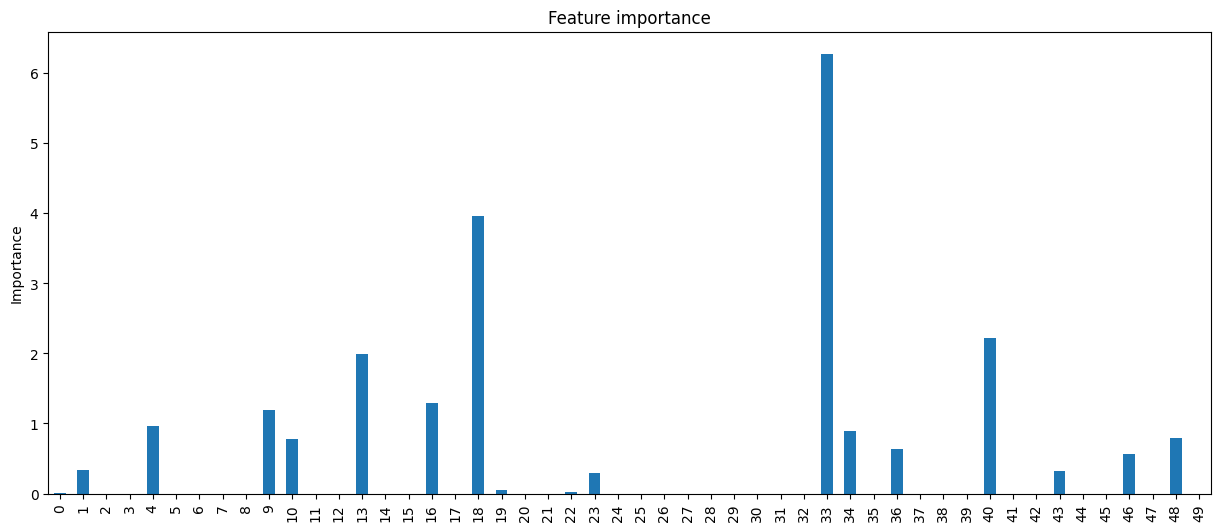

In [69]:
# Let's now plot the feature's importance
# according to the Lasso model.

# Create series with feature importance.
tmp = pd.Series(np.abs(model_Lasso_large_alpha.coef_))

# Let's add the variable names.
Xtrain = pd.DataFrame(Xtrain)
tmp.index = Xtrain.columns

# Let's make a bar plot.
tmp.plot.bar(figsize=(15, 6))
plt.title("Feature importance")
plt.ylabel("Importance")